## Apply Linear Regression, DecisionTree, and KNN

## 1- Introduction

For this Machine Learning Project, I have taken a dataset from Kaggle, which contains Weights, Heights, and Gender of 10,000 people. 
Here, this dataset I have used for building a Simple Linear Regression model, where Weight is predicted in responce to the Height feature of this dataset. Furthermore, I have used the same dataset to build two classification Models, Decision Tree and KNearestNeighbor (KNN). These Models predict the gender of a person whose weight and height are known. The accuracies of all these models have been measured by the suitable metrices, hence it was found that the models are fitted accurately and predicts unknown data with more than 90% accuracy scores. Moreover, basic data analysis methods have also been applied, such as Data Exploration, Visualization and Data Management with the help of Pandas, Matplotlib, and Numpy Libraries. All the methods od data science and machine learning are in the following stepwise sequence:  

## 2- Data Analysis

### 2.1 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### 2.2- Loading Dataset

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### 2.3- Checking for NaN or Null Values

In [3]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

### 2.4- Explore Data

In [6]:
# knowing the attributes of our dataset (rows, columns, and datatypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
# Describe the data
df.iloc[:, :].describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### 2.5- Visualize Data

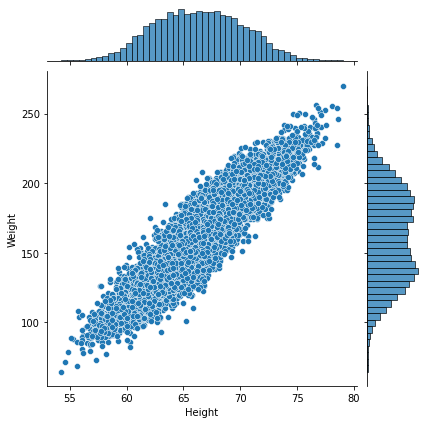

In [65]:
sns.jointplot(x='Height', y='Weight', data=df)

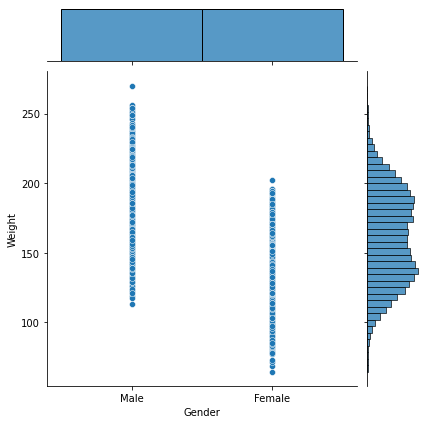

In [8]:
sns.jointplot(x='Gender', y='Weight', data=df)

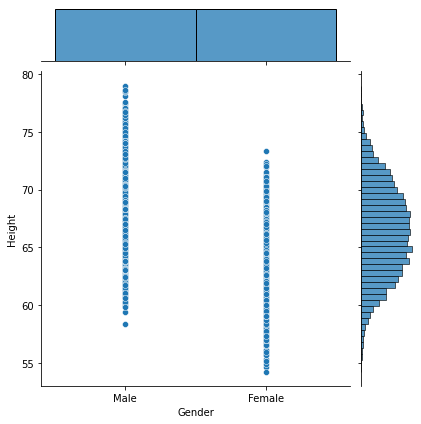

In [9]:
sns.jointplot(x='Gender', y='Height', data=df)

In [11]:
# Data encoding: getting dummy values for categorical data
df['Gender'] = df['Gender'].replace("Male", 1)
df['Gender'] = df['Gender'].replace("Female", 0)
df1 = df
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [12]:
df.tail(5)

,Gender,Height,Weight
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461
9999,0,61.944246,113.649103


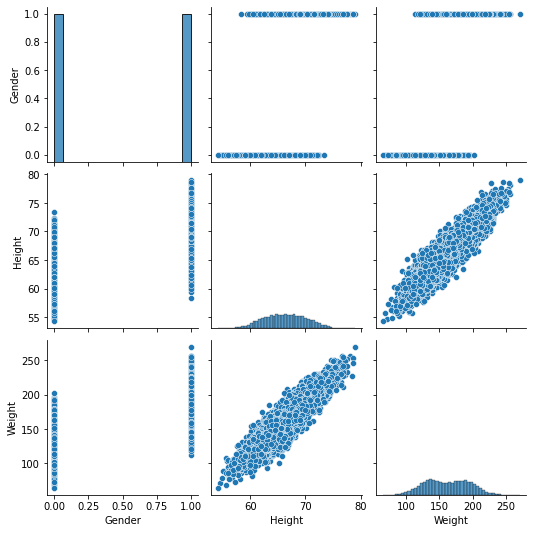

In [13]:
sns.pairplot(df[['Gender', 'Height', 'Weight']])

In [14]:
gen = pd.get_dummies(df['Gender'])
gen.head()

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [15]:
df['Male'] = gen.iloc[:, -1:]
df['Female'] = gen.iloc[:, 0:1]
df = df.filter(['Height', 'Weight', 'Male', 'Female'])
df.head()

,Height,Weight,Male,Female
0,73.847017,241.893563,1,0
1,68.781904,162.310473,1,0
2,74.110105,212.740856,1,0
3,71.730978,220.042470,1,0
4,69.881796,206.349801,1,0


<AxesSubplot:>

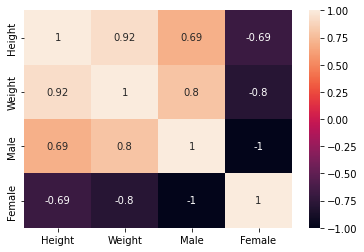

In [17]:
# HeatMap to show how the variables in our dataset are correlated 
sns.heatmap(df.corr(), annot=True)

## 3- Applying the suitable Machine Learning Models

### 3.1 Simple Linear Regression

In [18]:
df.head()

,Height,Weight,Male,Female
0,73.847017,241.893563,1,0
1,68.781904,162.310473,1,0
2,74.110105,212.740856,1,0
3,71.730978,220.042470,1,0
4,69.881796,206.349801,1,0


### 3.1.1 Selection of Feature and Responce Variables

In [19]:
X1 = df.iloc[:,0:1]
X1.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [20]:
y = df.iloc[:,1:2]
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [27]:
# The input is only height and 100% input data
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(X1, y)
model1

LinearRegression()

In [28]:
y1 = model1.predict(X1)
weights_pred = pd.DataFrame(y1, columns=['Weights'])
weights_pred.head(10)

,Weights
0,219.161480
1,180.072546
2,221.191809
3,202.831401
4,188.560728
5,168.273675
6,180.097066
7,176.727962
8,166.467320
9,138.974825


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=1/5, random_state=0)
y_pred = model1.predict(X_test)
y_pred

array([[148.75558183],
       [168.42149939],
       [224.36258506],
       ...,
       [159.1525448 ],
       [155.83742186],
       [144.79653194]])

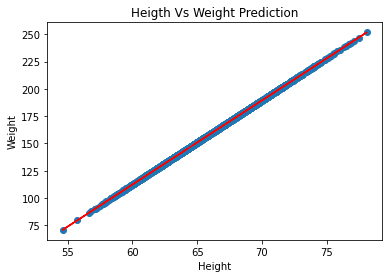

In [36]:
plt.scatter(X_test, y_test)
plt.plot( X_test, model1.predict(X_test), color='r')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Heigth Vs Weight Prediction")
plt.show()

#### 3.1.2 Evaluation

In [25]:
from sklearn.metrics import r2_score

In [34]:
print("Model Accuracy is:", model1.score(X_test, y_test))

Model Accuracy is: 1.0


### 3.2 Decision Tree Classifier

- Decision Tree Classifier algorithm is used here to predict the gender of people based on their height and weight.

#### 3.2.1 Loading Dataset

In [37]:
df2 = df1.iloc[:,0:3]
df2.tail()

,Gender,Height,Weight
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461
9999,0,61.944246,113.649103


#### 3.2.2 Selection of features and responce variable

In [38]:
X2 = df2.iloc[:,1:3]
X2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [39]:
y2 = df2.iloc[:,0:1]
y2.head()

,Gender
0,1
1,1
2,1
3,1
4,1


#### 3.2.3 Model Training

In [40]:
# import sickitlearn library
from sklearn.tree import DecisionTreeClassifier
# Train the model with 100% input data
model2 = DecisionTreeClassifier().fit(X2, y2)
model2

DecisionTreeClassifier()

In [47]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import plot_tree
# plot_tree(model2, filled=True)
# plt.show

#### 3.2.4 Model testing and Accuracy score

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=1/5, random_state=0)

In [53]:
model2 = DecisionTreeClassifier().fit(X2_train, y2_train)
model2

DecisionTreeClassifier()

In [54]:
gender_prediction = model2.predict(X2_test)
gender_prediction

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

- Hence, it can be seen that our model is predicting correct gender based on the test data

#### 3.2.5 Checking Model Accuracy

In [55]:
y2_test.head()

,Gender
9394,0
898,1
2398,1
5906,0
2343,1


In [56]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y2_test, gender_prediction)
score

0.877

#### 3.2.6 Saving my model for future use

In [ ]:
import joblib

joblib.dump(model2, "gender_prediction.joblib")  

### 3.3- K-Nearest-Neighbors

In this model, we will predict the gender based on height and weight of the person.

In [58]:
# the encoded dataset is as follows
df2.tail(5)

,Gender,Height,Weight
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461
9999,0,61.944246,113.649103


In [59]:
# For that, we need to import train_test_split function from sklearn library
from sklearn.model_selection import train_test_split

### 3.3.1 Selection of features and output variable

In [61]:
X3 = df2.iloc[:,1:3]
X3.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [62]:
y3 = df2.iloc[:,0:1]
y3.head()

,Gender
0,1
1,1
2,1
3,1
4,1


### 3.3.2 Training the model with all input data

In [63]:
# import KNN from scikitlearn library
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5) # n_neighbors=5 means 5 nearest points around the predicted point

# Train the model
knn_model.fit(X3, y3)

# Output prediction
knn_model.predict([[61.944246, 113.649103]])

C:\Users\scs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\scs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

- prediction is that if a person has height = 61.944246 and weight=113.649103, the model will tell that its female as seen above.

### 3.3.3  Testing our model and checking accuracy

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# splitting data into test and train proportion in the ratio of 80/20
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=1/5, random_state=0)

In [66]:
knn_model.predict(X3_test)
predicted_gender = pd.DataFrame(knn_model.predict(X3_test), columns=['Gender']) # Here the output data is assembeled into a pandas dataframe
predicted_gender.head(10)

,Gender
0,0
1,1
2,1
3,0
4,1
5,0
6,0
7,0
8,1
9,1


In [67]:
# For model accuracy, confuision metrix is used here
from sklearn.metrics import confusion_matrix
confusion_matrix(y3_test, predicted_gender)

array([[931,  81],
       [ 72, 916]], dtype=int64)

Correct Predictions = 1847 (931+916)\
Incorrect predictions = 153

### 3.3.4 Checking the model for n_neighbors = 7

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn_model.fit(X3, y3)

# Output prediction
knn_model.predict(X3_test)
predicted_gender = pd.DataFrame(knn_model.predict(X3_test), columns=['Gender'])
predicted_gender.head(10)

# For model accuracy, confuision metrix is used here
from sklearn.metrics import confusion_matrix
confusion_matrix(y3_test, predicted_gender)

C:\Users\scs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[934,  78],
       [ 77, 911]], dtype=int64)

Correct predictions = 1845\
Incorrect predictions = 155

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X3, y3)

# Output prediction
knn_model.predict(X3_test)
predicted_gender = pd.DataFrame(knn_model.predict(X3_test), columns=['Gender'])
predicted_gender.head(10)

# For model accuracy, confuision metrix is used here
from sklearn.metrics import confusion_matrix
confusion_matrix(y3_test, predicted_gender)

C:\Users\scs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[941,  71],
       [ 60, 928]], dtype=int64)

Correct predictions = 1869\
incorrect predictions = 131

Here, it is concluded that the model is most accurate with n_neighbors = 3